## Disease Diagnosis Prediction

This notebook aims to build a predictive model to estimate the likelihood of diabetes using the PIMA Indian Diabetes dataset. By analyzing key patient health metrics, we use machine learning algorithms to classify individuals as diabetic or non-diabetic.

The goal is to support early disease detection and assist healthcare professionals in identifying high-risk individuals for timely intervention and prevention.

**[Kaggle Source](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)**

### Step 1: Importing Required Libraries

In this section, we import all necessary libraries for:

- **Data analysis and manipulation**:  
  `pandas`, `numpy`

- **Data visualization**:  
  `seaborn`, `matplotlib`

- **Preprocessing and feature selection**:  
  `StandardScaler`, `SelectKBest`, `f_classif`

- **Machine learning model implementation**:  
  `GradientBoostingClassifier`, `SVC`, `MLPClassifier`

- **Model evaluation**:  
  `classification_report`, `roc_auc_score`, `roc_curve`, `f1_score`


In [29]:
# Importing Required Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Machine learning models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score


### Step 2: Load the Dataset

We load the **Pima Indians Diabetes dataset** using `pandas.read_csv()` function.

- The dataset contains medical records of female patients aged 21 and above.
- It includes features like **Glucose level**, **BMI**, **Age**, **Blood Pressure**, and others to predict the **likelihood of diabetes**.

We also preview:
- The **shape** of the dataset to understand the number of samples and features.
- The **first few rows** using `head()` to get an initial feel for the data structure.


In [30]:
# Load the Pima Indians Diabetes dataset from a CSV file
# Make sure the path is correct for your local environment
df = pd.read_csv(r"C:\Users\Ak\Desktop\Internship\Task 3 Disease Diagnosis Prediction\diabetes.csv")

# Optional: Define column names for clarity (already present in most versions of the dataset)
names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
         "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# 🧾 Display the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# 👀 Display the first 5 rows of the dataset for inspection
print(df.head())


Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Step 3: Exploratory Data Analysis (EDA) - Summary Statistics

This section provides an overview of the dataset through basic descriptive statistics and class distribution:

- **`describe()`** gives us insight into the range, central tendency (mean), and spread (std) of each feature.
- **`value_counts()`** on the `Outcome` column helps us understand class imbalance:
  - `0`: Non-diabetic cases
  - `1`: Diabetic cases

Understanding this distribution is crucial for selecting proper evaluation metrics and potentially balancing the data if necessary.


In [31]:
# Exploratory Data Analysis - Summary Statistics

# Display summary statistics for each feature (count, mean, std, min, max, etc.)
print("Basic Stats:\n", df.describe())

# Display the distribution of the target variable 'Outcome' (0 = Non-diabetic, 1 = Diabetic)
print("\nClass Distribution:\n", df['Outcome'].value_counts())


Basic Stats:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000    

### Step 4: Check for Missing and Duplicate Data

Before preprocessing, it’s essential to clean the data:

- **Missing Values**: We check for any null (NaN) values using `isnull().sum()`.
  - If any exist, appropriate imputation or row removal strategies may be required.
  
- **Duplicate Rows**: We use `duplicated().sum()` to find redundant entries that can bias the model.
  - If duplicates are found, they should be removed to ensure model accuracy.

This quality check helps maintain data integrity before scaling or training models.


In [32]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of duplicate rows: 0


###  Step 5: Feature Distribution Histograms

This section visualizes the distributions of three key features — **Glucose**, **BMI**, and **Age** — based on the diabetes outcome (0 = non-diabetic, 1 = diabetic).

- Each histogram overlays the distribution for both classes (`Outcome`) using different hues.
- `kde=True` adds a smoothed curve to help visualize the density.
- These plots help identify how each feature varies between diabetic and non-diabetic individuals, which can inform feature importance and selection.

**Figure:**
Distribution of Glucose, BMI, and Age among diabetic (1) and non-diabetic (0) individuals.


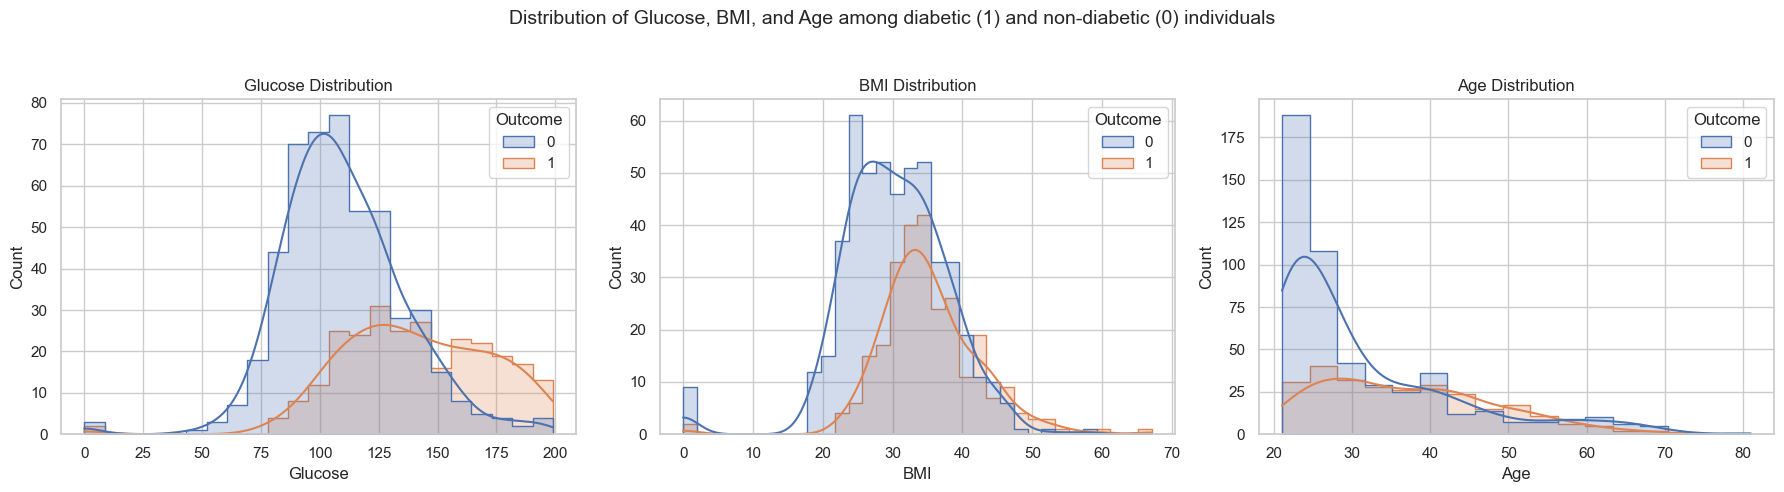

In [33]:
# Set Seaborn style for cleaner plots
sns.set(style="whitegrid")

# Create a 1-row, 3-column subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  Glucose distribution by Outcome
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True, element="step", ax=axes[0])
axes[0].set_title("Glucose Distribution")

#  BMI distribution by Outcome
sns.histplot(data=df, x="BMI", hue="Outcome", kde=True, element="step", ax=axes[1])
axes[1].set_title("BMI Distribution")

#  Age distribution by Outcome
sns.histplot(data=df, x="Age", hue="Outcome", kde=True, element="step", ax=axes[2])
axes[2].set_title("Age Distribution")

# Add a main title and adjust spacing
plt.suptitle("Distribution of Glucose, BMI, and Age among diabetic (1) and non-diabetic (0) individuals", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()


###  Step 6: Pairplot to Explore Feature Relationships

The pairplot is a powerful tool to visually explore **pairwise relationships** between all numerical features in the dataset, colored by the diabetes `Outcome`:

- Each scatter plot helps us observe how two features relate to each other across classes.
- Diagonal plots show feature distributions individually.
- This is useful for identifying patterns, clusters, and potential correlations.

This step gives a high-level overview of feature separability and potential multicollinearity.


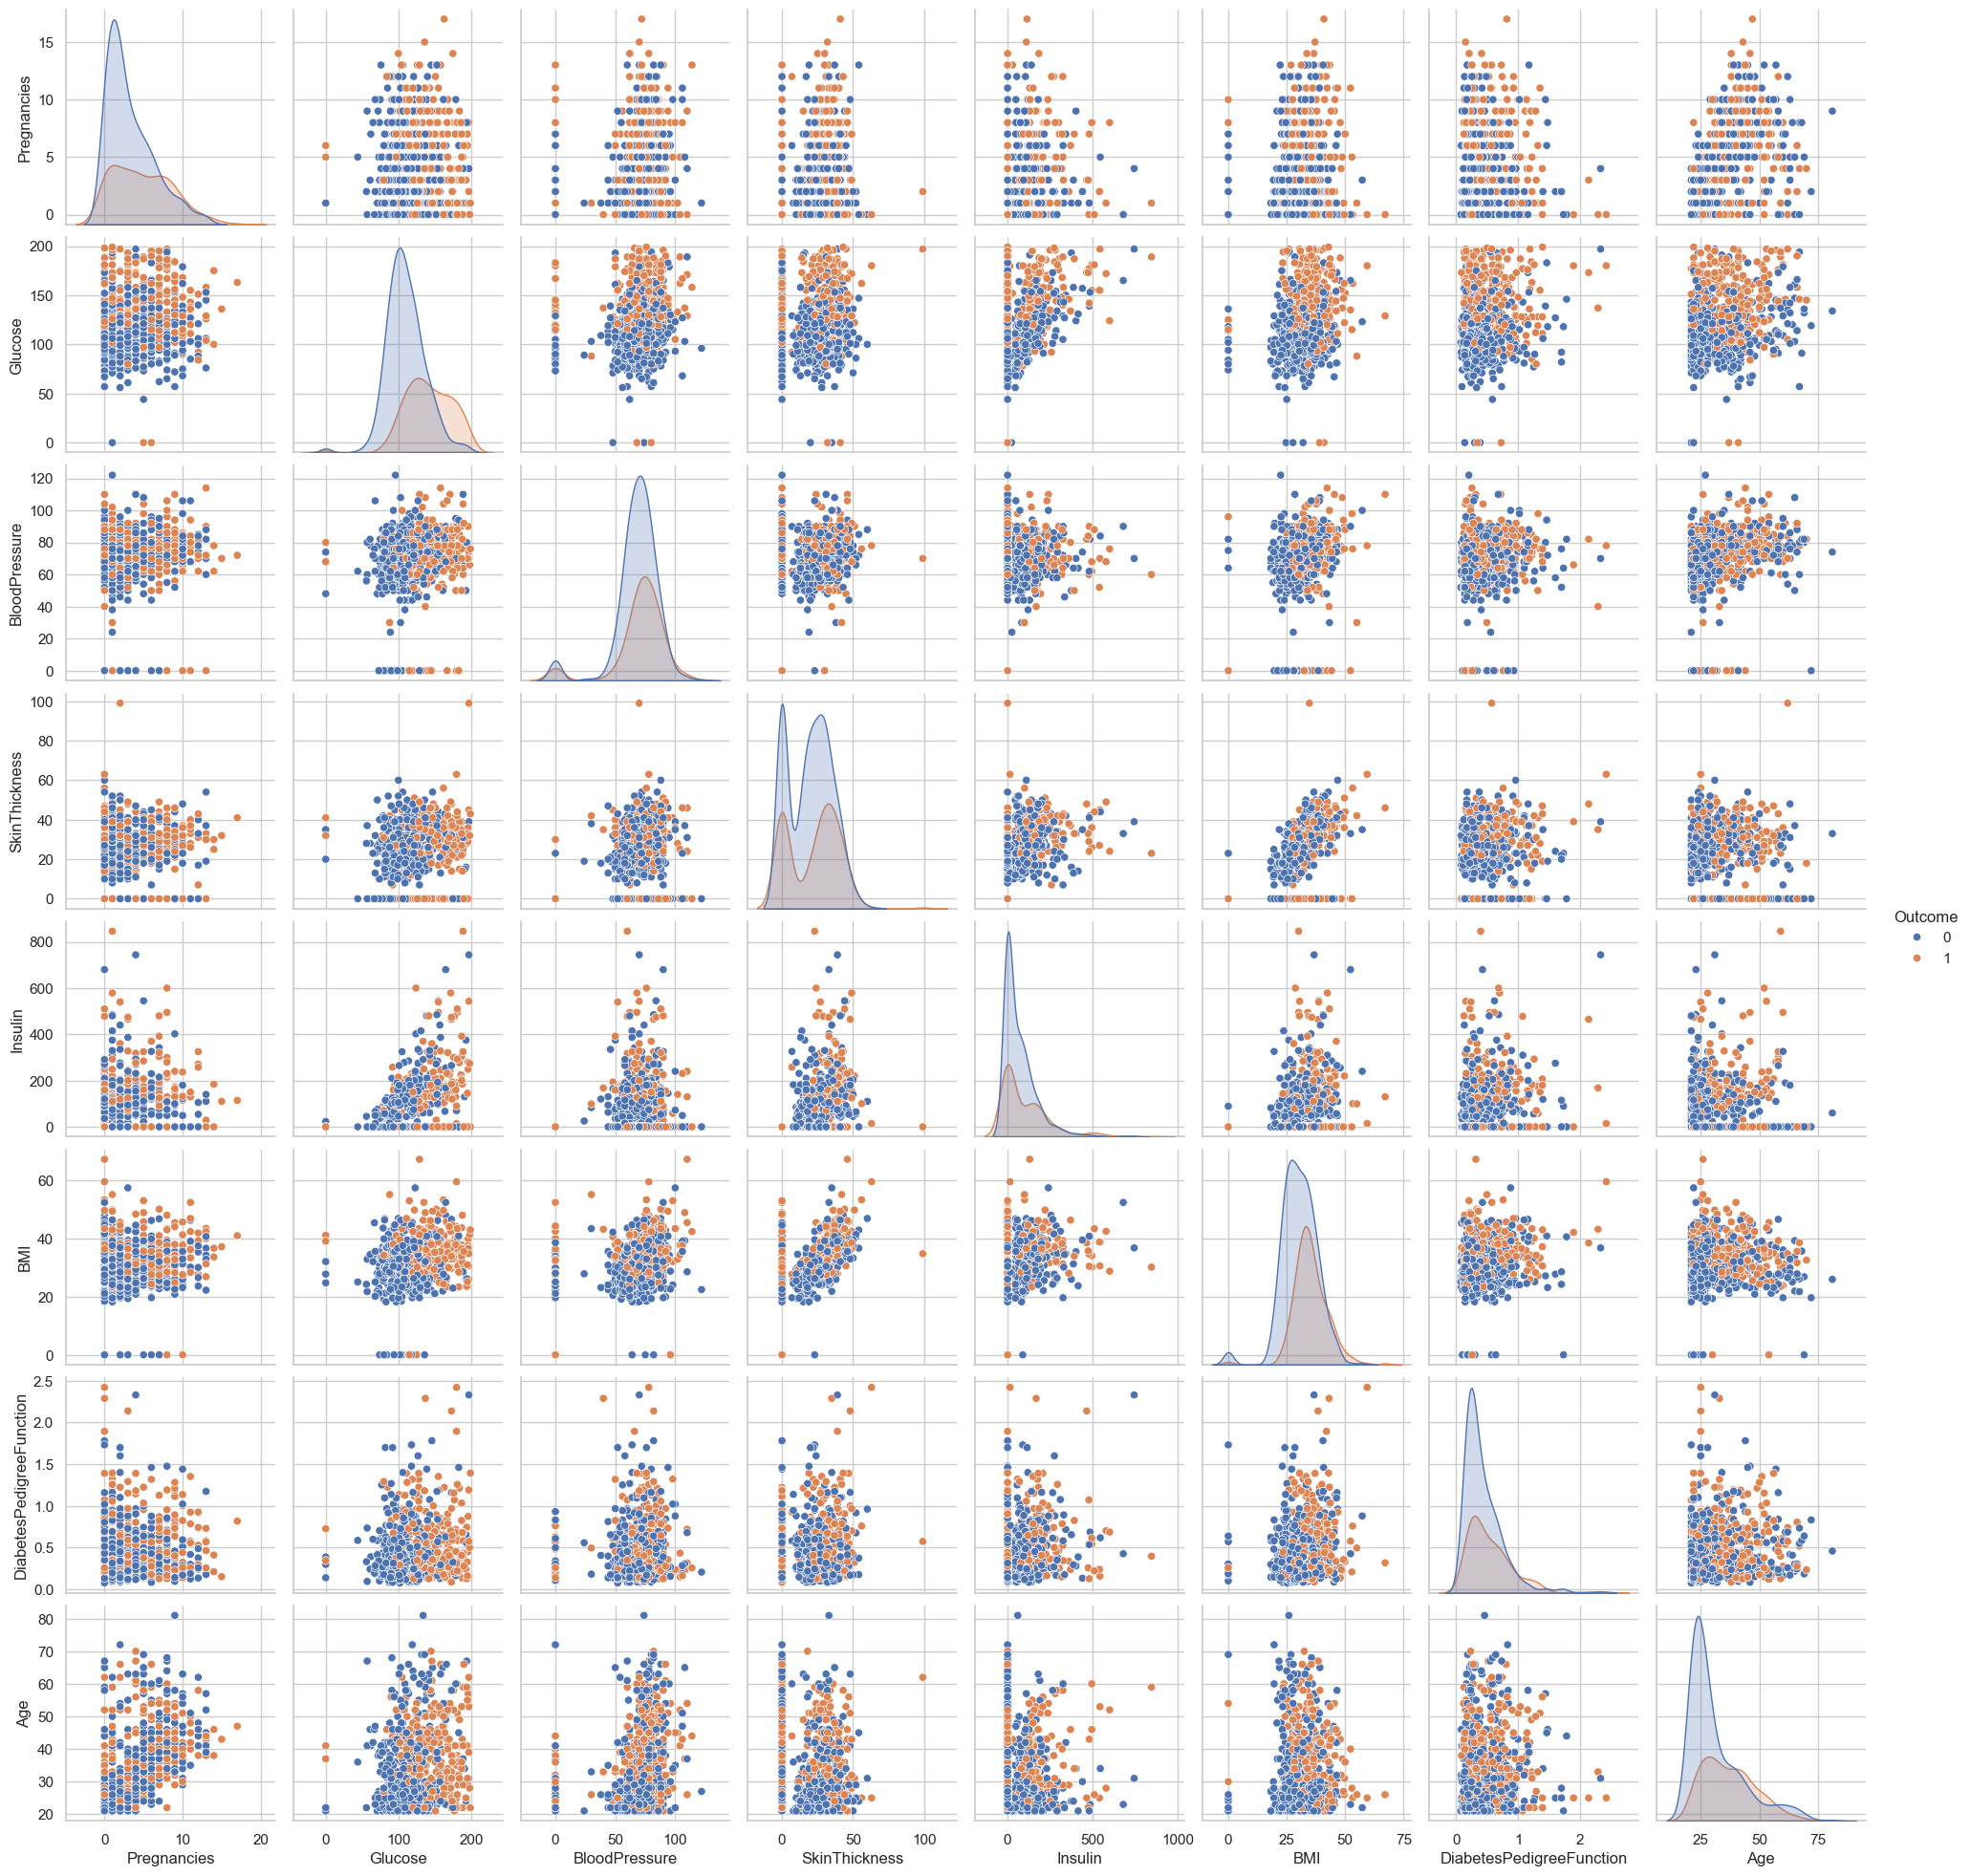

In [34]:
#  Create a pairplot to visualize pairwise relationships between features
# Colored by the target variable 'Outcome'
sns.pairplot(df, hue="Outcome")

# 📷 Show the plot
plt.show()


### Step 7: Boxplot for Outlier Detection

This step visualizes potential outliers in key numerical features using boxplots:

- Features included: Glucose, BloodPressure, BMI, and Age.
- Boxplots highlight the median, interquartile range (IQR), and possible outliers (points outside 1.5 * IQR).

Identifying and addressing outliers is important for improving model performance, especially for algorithms sensitive to extreme values.


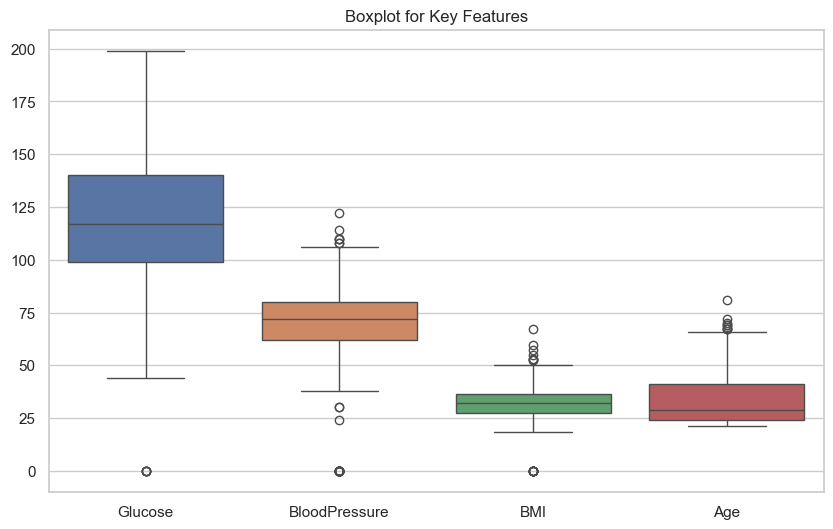

In [35]:
# Create a boxplot to detect outliers in key numerical features
plt.figure(figsize=(10, 6))

# Generate boxplots for selected features
sns.boxplot(data=df[["Glucose", "BloodPressure", "BMI", "Age"]])

# Add a title for context
plt.title("Boxplot for Key Features")

# Display the plot
plt.show()


### Step 8: Correlation Heatmap

This heatmap displays the **correlation matrix** for all numerical features in the dataset:

- It helps identify relationships between variables.
- Strong positive or negative correlations can indicate redundancy or key dependencies.
- For example, if two features are highly correlated, one might be removed to reduce multicollinearity.

This step is useful for both exploratory analysis and feature selection.


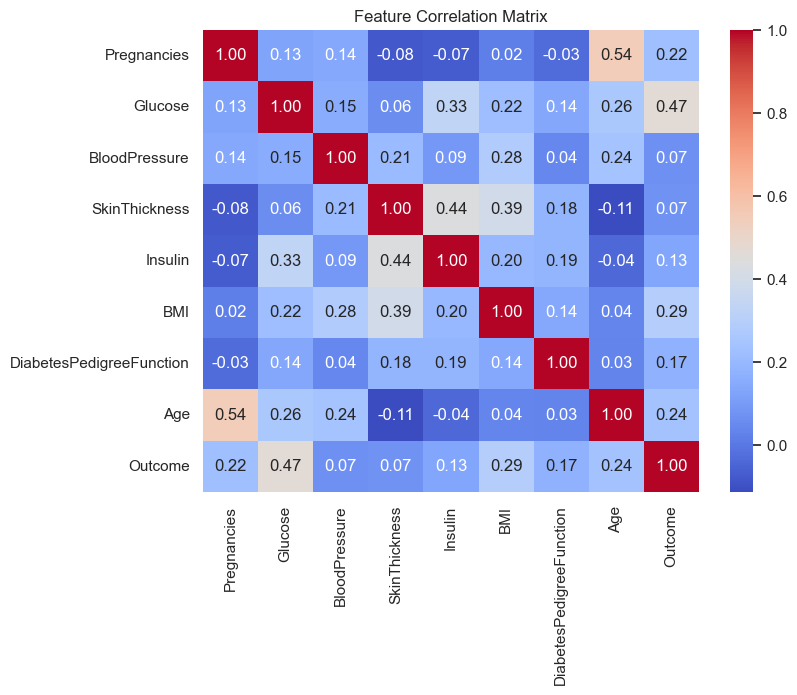

In [36]:
# Plot a heatmap to visualize correlations between features
plt.figure(figsize=(8, 6))

# Generate the correlation matrix heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the plot
plt.title("Feature Correlation Matrix")

# Display the heatmap
plt.show()

### Step 9: Feature and Target Separation

In this step, we split the dataset into:

- **Features (X)**: All columns except the target variable (`Outcome`)
- **Target (y)**: The `Outcome` column, which indicates whether a patient is diabetic (1) or not (0)

This separation is necessary before applying preprocessing techniques and training machine learning models.


In [37]:
# Separate the dataset into features (X) and target variable (y)

# X contains all features except the target column 'Outcome'
X = df.drop("Outcome", axis=1)

# y contains only the target variable 'Outcome'
y = df["Outcome"]


### Step 10: Feature Selection, Scaling, and Train-Test Split

This step includes three major preprocessing tasks:

- **Feature Selection**:  
  `SelectKBest` with ANOVA F-test (`f_classif`) is used to select the top 6 most relevant features to the target (`Outcome`).

- **Feature Scaling**:  
  `StandardScaler` is applied to standardize the selected features, ensuring each has a mean of 0 and a standard deviation of 1. This helps models like SVM and Neural Networks perform optimally.

- **Train-Test Split**:  
  The dataset is divided into training (70%) and testing (30%) sets using `train_test_split`. A `random_state` ensures reproducibility.

This prepares the data for training and evaluating machine learning models.


In [38]:
# Select top 6 features based on ANOVA F-score
selector = SelectKBest(score_func=f_classif, k=6)
X_new = selector.fit_transform(X, y)

# Get the names of selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Apply standard scaling to the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Selected Features: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')


### Step 11: Splitting Data into Training and Testing Sets

We use `train_test_split` to divide the dataset into:

- **Training Set (70%)**: Used to train machine learning models.
- **Testing Set (30%)**: Used to evaluate model performance on unseen data.

The `random_state=42` ensures the split is consistent every time the code is run. This step is crucial for assessing the model's generalization capability.


In [39]:
# Split the standardized feature set and target into training and testing sets
# 70% of the data is used for training, and 30% for testing
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Step 12: Model Training, Evaluation, and Healthcare Insights

We train and evaluate three classification models:  
- Support Vector Machine (SVM)  
- Gradient Boosting Classifier  
- Multi-layer Perceptron Neural Network

For each model:
- We compute **F1 Score** and display the **classification report**.
- We calculate the **ROC curve** and **AUC score** to evaluate model performance visually.

The **AUC-ROC curve** helps compare the models in terms of their ability to distinguish between diabetic and non-diabetic patients.

**Key Insights for Healthcare Professionals:**
- Features like **Glucose**, **BMI**, and **Age** are critical indicators of diabetes risk.
- These models assist in early identification of high-risk individuals using accessible medical data.
- The outcome supports **preventive care planning** and **targeted interventions**.



SVM
F1 Score: 0.6490066225165563
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.69      0.61      0.65        80

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231


Gradient Boosting
F1 Score: 0.6227544910179641
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.73      0.73       231


Neural Network
F1 Score: 0.5748502994011976
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       151
           1       0.55      0.60     

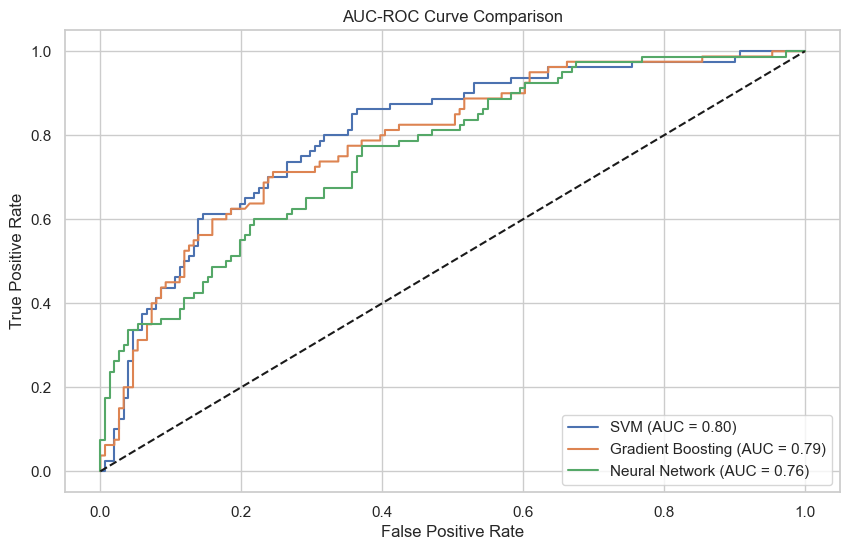

Insights for Healthcare Professionals:
- Elevated glucose, BMI, and age are strong indicators of diabetes in this dataset.
- This model helps in identifying at-risk individuals early using common test features.
- Clinicians can prioritize follow-up testing and lifestyle interventions accordingly.


In [41]:
# Define and initialize machine learning models
models = {
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network":  MLPClassifier(max_iter=1000, early_stopping=True)
}
# Create a figure for the ROC curve comparison
plt.figure(figsize=(10, 6))

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict labels and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Print evaluation metrics
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')
plt.title("AUC-ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print actionable insights
print("Insights for Healthcare Professionals:")
print("- Elevated glucose, BMI, and age are strong indicators of diabetes in this dataset.")
print("- This model helps in identifying at-risk individuals early using common test features.")
print("- Clinicians can prioritize follow-up testing and lifestyle interventions accordingly.")
